In [5]:
!pip install kaggle


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d c/digit-recognizer


403 - Forbidden - Permission 'datasets.get' was denied


In [9]:
import pandas as pd
file_path = '/content/drive/My Drive/train.csv'
df = pd.read_csv(file_path)


In [10]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.shape

(42000, 785)

In [12]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32958,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import matplotlib.pyplot as plt

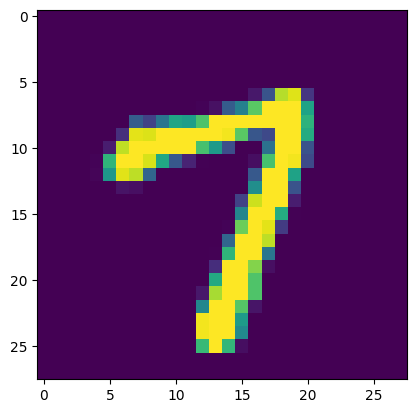

In [14]:
plt.imshow(df.iloc[206,1:].values.reshape(28,28))

#as we see from sample index 206 label is "7" alos we get the same through visualization

In [15]:
# splitting data into train and test

X= df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [17]:
X_train.shape

(33600, 784)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [23]:
# now apply PCA to reduce dimension

# step1 - Standardize Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Step2. appling PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=None)# none means we are creating components as equal to columns

In [26]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# so in this entire process we found our "eigen vector" and "eigen value" and shift
#data on new coordinates.

In [27]:
X_train.shape # we can see we have still 784 column becuase we choose n-components as none.

(33600, 784)

In [28]:
# now train our data with 100 column only

from sklearn.decomposition import PCA
pca = PCA(n_components=100)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape

(33600, 100)

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test_trf)

In [32]:
accuracy_score(y_test, y_pred)

# by taking 100 column we are getting 95 % accuracy which are not bad compare to 96 %. but
# we can try with other pca number to check on which number we are getting best accuracy

0.9542857142857143

In [ ]:
# will create loop to run pca with all columns to check where we are getting better accuracy

for i in range(1,785):
    pca= PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))


0.255
0.3236904761904762
0.5103571428571428
0.665952380952381
0.7382142857142857
0.8226190476190476
0.8436904761904762
0.8721428571428571
0.8875
0.9058333333333334
0.9120238095238096
0.9175
0.9286904761904762
0.9348809523809524
0.9382142857142857
0.9379761904761905
0.9394047619047619
0.9420238095238095
0.9428571428571428
0.9444047619047619
0.9438095238095238
0.9433333333333334
0.9452380952380952
0.9442857142857143
0.9486904761904762
0.9494047619047619
0.9476190476190476
0.9486904761904762
0.949047619047619
0.9492857142857143
0.950595238095238
0.9519047619047619
0.9502380952380952
0.9503571428571429
0.9507142857142857
0.9516666666666667
0.9522619047619048
0.9522619047619048
0.9528571428571428
0.9523809523809523
0.9523809523809523
0.9528571428571428
0.9534523809523809
0.9526190476190476
0.9527380952380953
0.9536904761904762
0.9533333333333334
0.9536904761904762
0.954047619047619
0.954047619047619
0.9539285714285715
0.9536904761904762
0.954047619047619
0.9536904761904762
0.954761904761904

As we observe the results, initially, we notice a rapid increase in the accuracy rate as we reduce the number of components. This is because we're capturing the main patterns in the data. However, as we approach a smaller number of components, say around 100, the rate of increase in accuracy starts to slow down. This happens because we've already included the most significant principal components in this reduced set.
So, achieving a 95% accuracy after reducing the components to 100 is still a great outcome. It signifies that we're obtaining a high accuracy while significantly reducing the computational cost by using fewer components.# on result we can see accuracy rate are increasing very high, but gradually rate of increase start decrease because main principal component are starting one. so if we are getting 95% after reducing componenets till 100 this still count as better result as we decrease components cost.

In [33]:
pca= PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [34]:
 X_train_trf

array([[-2.718674  , -0.48988809],
       [-0.67699737, -6.75344152],
       [-3.03317711,  6.50977567],
       ...,
       [ 2.1488667 ,  0.78071004],
       [ 1.05954613,  0.94753752],
       [17.70265124,  1.96181094]])

In [35]:
#Transorming in 2d

import plotly.express as px
y_train_trf = y_train.astype(str)
fig= px.scatter(x=X_train_trf[:,0],
               y= X_train_trf[:,1],
                color= y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
    )
fig.show()


This is 2d visualization of 784 data.
We have a dataset with 33,000 points, each belonging to one of nine different classes. We use color to represent and distinguish these classes on a 2D plot. While the 2D visualization doesn't allow us to see all the classes in detail, it provides a general sense of how the points are distributed across the classes.

In [37]:
# Transforming in 3d

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [38]:
X_train_trf

# Now each image has three value one is in x direction, y direction and z direction

array([[-2.71863046, -0.49044955,  1.13531033],
       [-0.67694229, -6.75428218, -2.33655998],
       [-3.03328691,  6.51125733,  7.49278584],
       ...,
       [ 2.14881587,  0.78106021, -0.74715118],
       [ 1.05958581,  0.94709205,  3.94942153],
       [17.7026333 ,  1.96098364, -4.94429462]])

In [39]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig= px.scatter_3d(df, x= X_train_trf[:,0],y= X_train_trf[:,1],z=X_train_trf[:,2],
                color= y_train_trf)

fig.update_layout(
        margin=dict(l=20,r=20,t=20,b=20 )
)
fig.show()

In [40]:
# as per visualization we can see green"3" and yellow"2" are giving similiar result,
#and blue color is also aligned with green color because "3" and "8" is similiar number
# in look. "0" and "9" also have sort of intrection.

In [41]:
pca.explained_variance_

# this is giving 3 number which is representation of "Eigen Value"

array([40.67111198, 29.17023309, 26.744596  ])

In [42]:
pca.components_

# this will give set of 3 vector in 784 dimensional space.

array([[ 1.00000000e+00,  9.57060027e-10,  7.43525781e-10, ...,
         1.27585938e-33, -5.31816302e-34, -5.37702826e-35],
       [-8.63927310e-10,  9.99999993e-01, -1.38053105e-07, ...,
         6.58285029e-36,  8.08892399e-34,  1.89133358e-34],
       [-6.50744374e-10,  1.32977582e-07,  9.99999998e-01, ...,
         1.77500361e-33, -2.94773763e-34,  1.34824399e-34]])

In [43]:
pca.explained_variance_ratio_

# this will give percentage value of components which help to see for getting 91% expalnation of data how much components we need.
# top 3 components only explaining 12 % variation of data.

array([0.05785192, 0.0414927 , 0.03804239])

In [44]:
# again performing PCA with all components

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
pca.explained_variance_

# now this time we can see 784 components as we choosen all 784 column.

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [46]:
pca.components_
# now we hve 784 vectors in 784 dimensional space

array([[ 1.00000000e+00, -1.12306574e-16,  1.73612193e-16, ...,
         1.38343398e-33, -6.57365916e-34, -5.84462553e-35],
       [ 1.12306574e-16,  1.00000000e+00,  4.44089210e-15, ...,
        -1.62739409e-33,  1.31792355e-33, -2.40741233e-35],
       [-1.73612193e-16, -4.66293670e-15,  1.00000000e+00, ...,
        -3.43464852e-33,  1.26164944e-33,  2.46759805e-34],
       ...,
       [-0.00000000e+00, -3.73347618e-32, -1.11950151e-32, ...,
        -1.65977544e-01,  4.40256474e-01,  8.47409651e-02],
       [ 0.00000000e+00,  2.80610792e-32,  2.62243130e-32, ...,
        -7.20038769e-03,  5.78142510e-01,  1.40522241e-01],
       [ 0.00000000e+00,  2.59468132e-33, -7.57352861e-33, ...,
        -4.65391390e-01,  3.28138396e-01,  4.24944796e-02]])

In [47]:
pca.components_.shape

(784, 784)

In [48]:
pca.explained_variance_ratio_

# it will give percentage summary of each vector "how much variation they explained in data"

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [50]:
# Now will apply "Cumulative Sum" to find 91%
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

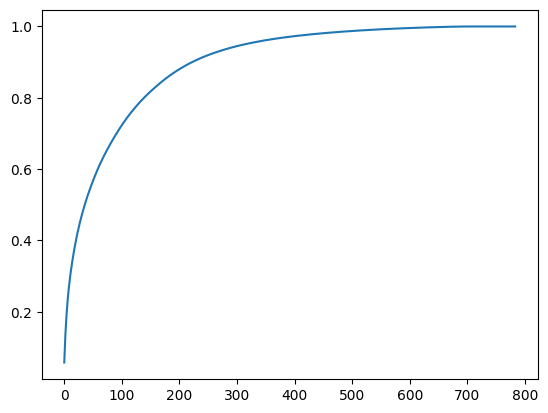

In [51]:
# now will plot graph to see on which point we are reaching on 91 percentage rather than manually counting

plt.plot(np.cumsum(pca.explained_variance_ratio_))


on x-axis we have number of component and on y-axis variance how much explained we can see graph is increasing and finally get settle towards 1. so for getting 91percent we will draw a line on x-axis and can see around 200 components we are getting 91 percent data explained. by explaining 91 percent data we can get good result.